## EDA Notebook for Final Project

This notebook contains the EDA for the nrc_public_datasets project

In [3]:
# import modules:
import pandas as pd

#### Let's load in all the datasets

Note, the files loaded here were either scraped from the web or manually downloaded and combined separately using pandas.  See the .py files in the main directory for these supporting codes.

Load in licensee event reports since 1991, information notices, and generic issues.

In [4]:
licensee_event_reports = pd.read_excel("./data/all_LERs.xlsx")
information_notices = pd.read_excel("./data/Information Notices - Scraped from Public Site.xlsx")
generic_safety_issues = pd.read_excel("./data/generic-issues-dataset.xls")

#### Let's just look at the heads of each file first to see what we have collected

Display the heads of each dataset.

In [5]:
licensee_event_reports.head()

,LER Number,Plant Name,Event Date,Report Date,Accession #,Title
0,291991001,Yankee-Rowe,02/26/1991,03/28/1991,9104030139,<strong>Inadequate Quality Controls Result in ...
1,291991002,Yankee-Rowe,06/15/1991,07/16/1991,9107220232,<strong>Reactor Scram/Turbine Trip and Loss of...
2,291991003,Yankee-Rowe,08/01/1991,08/30/1991,9109040225,<strong>Failure to Perform Surveillances Requi...
3,291991004,Yankee-Rowe,08/03/1991,09/02/1991,9109040086,<strong>Reactor Scram Due To Loss Of Generator...
4,291991005,Yankee-Rowe,11/05/1991,12/04/1991,9112090331,<strong>All Emergency Diesel Generators Declar...


In [6]:
information_notices.head()

,Number,Title,Date,Link
0,IN-79-37,Cracking in Low Pressure Turbine Discs,12/28/1979,https://www.nrc.gov/reading-rm/doc-collections...
1,IN-79-36,Computer Code Defect in Stress Analysis of Pip...,12/31/1979,https://www.nrc.gov/reading-rm/doc-collections...
2,IN-79-35,Control of Maintenance and Essential Equipment,12/31/1979,https://www.nrc.gov/reading-rm/doc-collections...
3,IN-79-34,Inadequate Design of Safety-Related Heat Excha...,12/27/1979,https://www.nrc.gov/reading-rm/doc-collections...
4,IN-79-33,Improper Closure of Primary Containment Access...,12/21/1979,https://www.nrc.gov/reading-rm/doc-collections...


Check Generic Safety Issues:

In [7]:
generic_safety_issues.head()

,Issue Number,Issue Title,Issue Description,Project Manager,Lead Branch,Status / Priority Ranking,Resolution Result,Resolution Product Category,Issue Revision Number,Date of Identification,Date of Resolution,Multi-Plant Action Number,Related Technical Area,Facility Types,Related Generic Issues,Related Generic Communications,Related Industry Documents,Related Events,Additional Information
0,I.A.1.1,OPERATING PERSONNEL: Operating Personnel and S...,http://www.nrc.gov/reading-rm/doc-collections/...,-,NRR/DHFS/LQB,I (Resolved TMI Action Plan item by NUREG-0737),NaN,NaN,3.0,1979-10-30,1997-12-31,F-01,"Human Performance, Other",All Light Water Power Reactors,NaN,NaN,NaN,NaN,NaN
1,I.A.1.2,OPERATING PERSONNEL: Operating Personnel and S...,http://www.nrc.gov/reading-rm/doc-collections/...,-,NRR/DHFS/LQB,I (Resolved TMI Action Plan item by NUREG-0737),NaN,NaN,3.0,1979-10-30,1997-12-31,NaN,"Human Performance, Other",All Light Water Power Reactors,NaN,NaN,NaN,NaN,NaN
2,I.A.1.3,OPERATING PERSONNEL: Operating Personnel and S...,http://www.nrc.gov/reading-rm/doc-collections/...,-,NRR/DHFS/LQB,I (Resolved TMI Action Plan item by NUREG-0737),NaN,NaN,3.0,1979-10-30,1997-12-31,F-02,"Human Performance, Worker Fatigue",All Light Water Power Reactors,NaN,NaN,NaN,NaN,NaN
3,I.A.1.4,OPERATING PERSONNEL: Operating Personnel and S...,http://www.nrc.gov/reading-rm/doc-collections/...,R. Colmar,RES/DFO/HFBR,Resolved with Products (NOTE 3a),NaN,Policy and Rules,3.0,1979-10-30,1987-01-06,NaN,"Human Performance, Worker Fatigue",All Light Water Power Reactors,NaN,NaN,"NUREG-0660, SECY-81-440, SECY-83-52A",NaN,NaN
4,I.A.2.1(1),OPERATING PERSONNEL: Training and Qualificatio...,http://www.nrc.gov/reading-rm/doc-collections/...,-,NRR/DHFS/LQB,I (Resolved TMI Action Plan item by NUREG-0737),NaN,NaN,6.0,1979-10-30,1997-12-31,F-03,Human Performance,All Light Water Power Reactors,NaN,NaN,NUREG-0660,NaN,NaN


Let's take a look at the datatypes in each dataframe:

In [8]:
pd.DataFrame(licensee_event_reports.dtypes, columns=['DataType'])

,DataType
LER Number,int64
Plant Name,object
Event Date,object
Report Date,object
Accession #,object
Title,object


In [9]:
pd.DataFrame(information_notices.dtypes, columns=['DataType'])

,DataType
Number,object
Title,object
Date,object
Link,object


In [10]:
pd.DataFrame(generic_safety_issues.dtypes, columns=['DataType'])

,DataType
Issue Number,object
Issue Title,object
Issue Description,object
Project Manager,object
Lead Branch,object
Status / Priority Ranking,object
Resolution Result,object
Resolution Product Category,object
Issue Revision Number,float64
Date of Identification,datetime64[ns]


#### Converting and Cleaning up the data

From the above, a lot of the date fields were not automatically detected as such.  To do trending, we need to fix the data types first.  The generic_safety_issue dataframe correctly loaded the pertinent dates as datetime64, but the others did not.  Let's convert the date columns to dates:

In [11]:
licensee_event_reports['Report Date'].head(3)

0    03/28/1991
1    07/16/1991
2    08/30/1991
Name: Report Date, dtype: object

Let's convert the dates using the pandas function to_datetime using inference:

In [12]:
licensee_event_reports['Report Date']=pd.to_datetime(licensee_event_reports['Report Date'],infer_datetime_format=True)
licensee_event_reports['Event Date']=pd.to_datetime(licensee_event_reports['Event Date'],infer_datetime_format=True)

In [13]:
licensee_event_reports.head(3)

,LER Number,Plant Name,Event Date,Report Date,Accession #,Title
0,291991001,Yankee-Rowe,1991-02-26,1991-03-28,9104030139,<strong>Inadequate Quality Controls Result in ...
1,291991002,Yankee-Rowe,1991-06-15,1991-07-16,9107220232,<strong>Reactor Scram/Turbine Trip and Loss of...
2,291991003,Yankee-Rowe,1991-08-01,1991-08-30,9109040225,<strong>Failure to Perform Surveillances Requi...


In [14]:
pd.DataFrame(licensee_event_reports.dtypes, columns=['DataType'])

,DataType
LER Number,int64
Plant Name,object
Event Date,datetime64[ns]
Report Date,datetime64[ns]
Accession #,object
Title,object


This works for the licensee_event_reports dataframe, but when we try to do the same for information_notices, we get the following error:

In [15]:
information_notices['Date']=pd.to_datetime(information_notices['Date'],infer_datetime_format=True)

ValueError: ('Unknown string format:', 'Not Issued')

Inspection of the error indicates that the process failed because there is a "Not Issues" string in the information_notices date column, so we need to do some cleaning.....

In [16]:
information_notices[information_notices['Date'] == 'Not Issued'].head(3)

,Number,Title,Date,Link
101,IN-81-17,NaN,Not Issued,https://www.nrc.gov/reading-rm/doc-collections...
1901,IN-11-18,NaN,Not Issued,https://www.nrc.gov/reading-rm/doc-collections...
1903,IN-11-16,NaN,Not Issued,https://www.nrc.gov/reading-rm/doc-collections...


In these cases, the documents were not issued.  For our purposes, we do not need to know about information notices that were not issued, so we can drop them.

We also have some supplements, which are revisions to the information notices, numbered with S1, S2, etc.  We don't care about those, either, for this project, since the topics are the same.  What we really want is the number of new operating experiences issued, and we don't want to include supplements in this total.  For example, searching for the second supplements S2:

In [17]:
information_notices[information_notices['Number'] == 'S2'].head(3)

,Number,Title,Date,Link
456,S2,11/19/1987,NaN,https://www.nrc.gov/reading-rm/doc-collections...
460,S2,03/18/1987,NaN,https://www.nrc.gov/reading-rm/doc-collections...
695,S2,12/30/1988,NaN,https://www.nrc.gov/reading-rm/doc-collections...


If we look at the above, the unissued items have no titles ("NaN"), and the dates for the supplements in the dataset are "NaN" due to an offset when scraping the data from the public website.  To remove these items, we can simply use dropna:

In [18]:
information_notices = information_notices.dropna()

Now, time to convert the cleaned dataframe dates:

In [19]:
information_notices['Date']=pd.to_datetime(information_notices['Date'],infer_datetime_format=True)

In [20]:
pd.DataFrame(information_notices.dtypes, columns=['DataType'])

,DataType
Number,object
Title,object
Date,datetime64[ns]
Link,object


Success!  OK, let's look at some plots.....

#### Investigation of data
Let's delve into the data a bit, and explore some features, starting with licensee event reports, which are reports made by nuclear power plant licensees when certain issues occur:

In [21]:
licensee_event_reports.groupby('Plant Name')['LER Number'].count()

Plant Name
Arkansas 1                                         82
Arkansas 1, Arkansas 2                             25
Arkansas 2                                         96
Arkansas 2, Arkansas 1                              7
Beaver Valley 1                                   165
Beaver Valley 1, Beaver Valley 2                   65
Beaver Valley 2                                   112
Beaver Valley 2, Beaver Valley 1                   16
Big Rock Point                                     78
Braidwood 1                                        88
Braidwood 1, Braidwood 2                           67
Braidwood 2                                        80
Braidwood 2, Braidwood 1                            4
Browns Ferry 1                                     46
Browns Ferry 1, Browns Ferry 2                      6
Browns Ferry 1, Browns Ferry 2, Browns Ferry 3     52
Browns Ferry 1, Browns Ferry 3                      2
Browns Ferry 2                                    124
Browns Ferry 2, B

What we see here is that sites with multiple plants may report as one plant, two plants, three, or a combination of these if an issue impacts more than one unit at the site.  Depending on how you want to analyze the date, this may be OK, or you may want to aggregate the units by site.  Let's create a code for the site.  The first five letters of each of the entries should do the trick for our purposes:

In [70]:
ler_sites = licensee_event_reports['Plant Name'].str[:5]
licensee_event_reports['Sites']=ler_sites
licensee_event_reports.head(5)

,LER Number,Plant Name,Event Date,Report Date,Accession #,Title,Sites
0,291991001,Yankee-Rowe,1991-02-26,1991-03-28,9104030139,<strong>Inadequate Quality Controls Result in ...,Yanke
1,291991002,Yankee-Rowe,1991-06-15,1991-07-16,9107220232,<strong>Reactor Scram/Turbine Trip and Loss of...,Yanke
2,291991003,Yankee-Rowe,1991-08-01,1991-08-30,9109040225,<strong>Failure to Perform Surveillances Requi...,Yanke
3,291991004,Yankee-Rowe,1991-08-03,1991-09-02,9109040086,<strong>Reactor Scram Due To Loss Of Generator...,Yanke
4,291991005,Yankee-Rowe,1991-11-05,1991-12-04,9112090331,<strong>All Emergency Diesel Generators Declar...,Yanke


Now, we can aggregate by site if we like:

In [73]:
licensee_event_reports.groupby('Sites')['LER Number'].count()

Sites
Arkan    210
Beave    358
Big R     78
Braid    239
Brown    374
Bruns    336
Byron    191
Calla    185
Calve    198
Cataw    253
Clint    249
Colum    271
Coman    248
Cook     342
Coope    299
Cryst    226
Davis    154
Diabl    332
Dresd    495
Duane    187
Farle    214
Fermi    220
FitzP    277
Fort     272
Ginna    130
Grand    194
Hadda    179
Harri    208
Hatch    368
Hope     292
        ... 
Palo     357
Peach    282
Perry    217
Pilgr    272
Point    299
Prair    266
Quad     402
Ranch      1
River    285
Robin    160
Salem    478
San O    304
Seabr    185
Sequo    292
Shore      4
South    306
St. L    278
Summe    150
Surry    224
Susqu    432
Three    113
Troja     79
Turke    221
Vermo    204
Vogtl    232
Water    249
Watts    175
Wolf     252
Yanke     12
Zion     201
Name: LER Number, Length: 75, dtype: int64

We can also look at the number of information notices by year:

In [22]:
information_notices['Number'].groupby(information_notices.Date.dt.year).count()


Date
1979     38
1980     43
1981     32
1982     60
1983     81
1984     90
1985    100
1986    104
1987     66
1988     94
1989     87
1990     83
1991     93
1992     82
1993     97
1994     97
1995     61
1996     71
1997     96
1998     49
1999     36
2000     22
2001     20
2002     33
2003     24
2004     23
2005     33
2006     32
2007     41
2008     21
2009     30
2010     27
2011     20
2012     23
2013     22
2014     15
2015     12
2016     13
2017      7
2018     11
2019     13
Name: Number, dtype: int64

We can also list the number of generic safety issues by year:

In [74]:
generic_safety_issues['Issue Title'].groupby(information_notices.Date.dt.year).count()

Date
1979.0     38
1980.0     43
1981.0     32
1982.0     60
1983.0     81
1984.0     90
1985.0    100
1986.0    103
1987.0     66
1988.0     94
1989.0     87
1990.0     20
1991.0     10
1993.0      1
1994.0      2
1995.0      2
1997.0      1
1998.0      1
1999.0      1
2003.0      1
Name: Issue Title, dtype: int64

#### Plotting General Trends of Interest
Let's take a look at the yearly trends for each of these datasets:

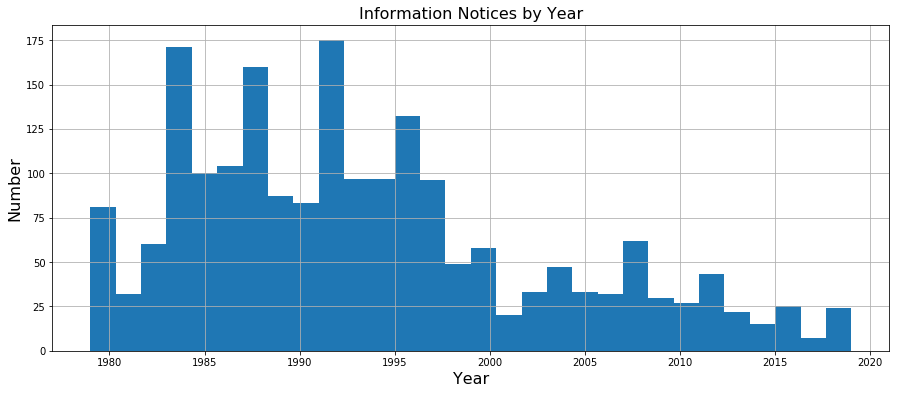

In [62]:
ax = information_notices.Date.dt.year.hist(bins=30, figsize=(15,6))
ax.set_title('Information Notices by Year', fontsize=16);
ax.set_xlabel('Year', fontsize=16);
ax.set_ylabel('Number', fontsize=16);

From the above, it seems that the number of information notices by year were most prevalent in the 1980s, then deccreased in the 1990s, and held relatively steady throughout the 2000s.  A local minimum seems to occur in 2018.

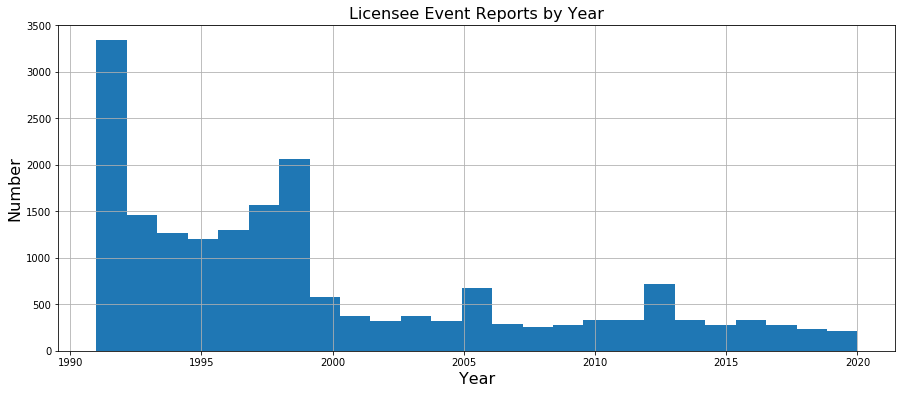

In [63]:
ax = licensee_event_reports['Report Date'].dt.year.hist(bins=25, figsize=(15,6))
ax.set_title('Licensee Event Reports by Year', fontsize=16);
ax.set_xlabel('Year', fontsize=16);
ax.set_ylabel('Number', fontsize=16);

From the above, it seems that the number of licensee event reports were much higher i the 1990s that in years after 2000.  A generally downward trend appears to occur after 2016.

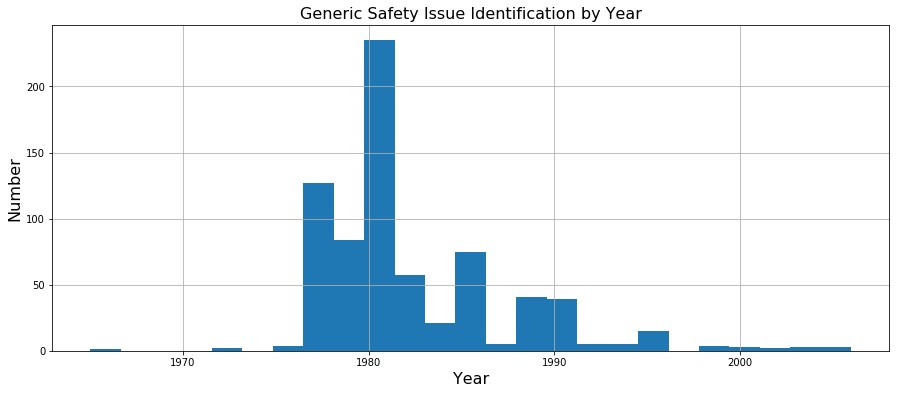

In [60]:
ax = generic_safety_issues['Date of Identification'].dt.year.hist(bins=25, figsize=(15,6))
ax.set_title('Generic Safety Issue Identification by Year', fontsize=16);
ax.set_xlabel('Year', fontsize=16);
ax.set_ylabel('Number', fontsize=16);

The above plot shows that there were a large number of generic safety issues identified from 1975 to 1990.  A much lower number have been identified since 1991.

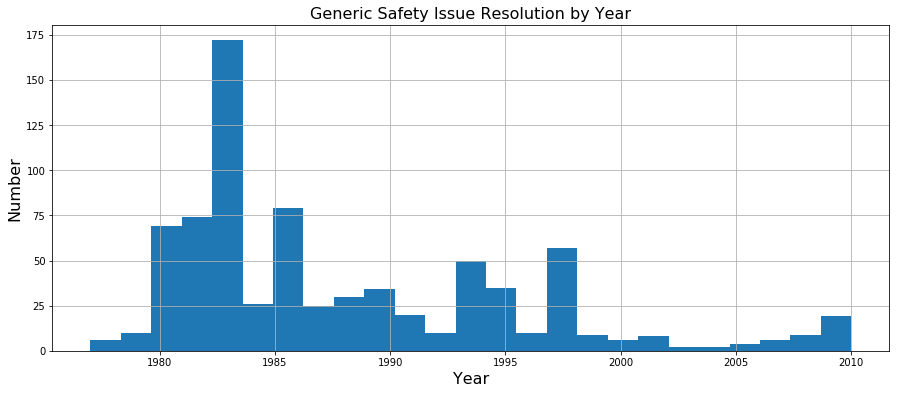

In [61]:
ax = generic_safety_issues['Date of Resolution'].dt.year.hist(bins=25, figsize=(15,6))
ax.set_title('Generic Safety Issue Resolution by Year', fontsize=16);
ax.set_xlabel('Year', fontsize=16);
ax.set_ylabel('Number', fontsize=16);

The above plot shows that most generic safety issues were resolved by the year 2000.  Interestingly, the number of resolved generic safety issues increased from 2005 to 2010.

We can also look into the licensee event report trend for individual sites, for example, at Surry Power Station:

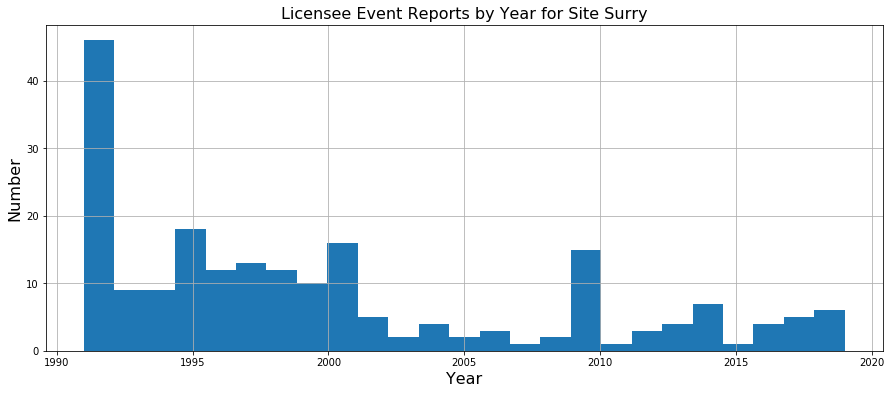

In [80]:
ax = licensee_event_reports[licensee_event_reports['Sites']=='Surry']['Report Date'].dt.year.hist(bins=25, figsize=(15,6))
ax.set_title('Licensee Event Reports by Year for Site Surry', fontsize=16);
ax.set_xlabel('Year', fontsize=16);
ax.set_ylabel('Number', fontsize=16);

Or even focus our attention on a single unit:

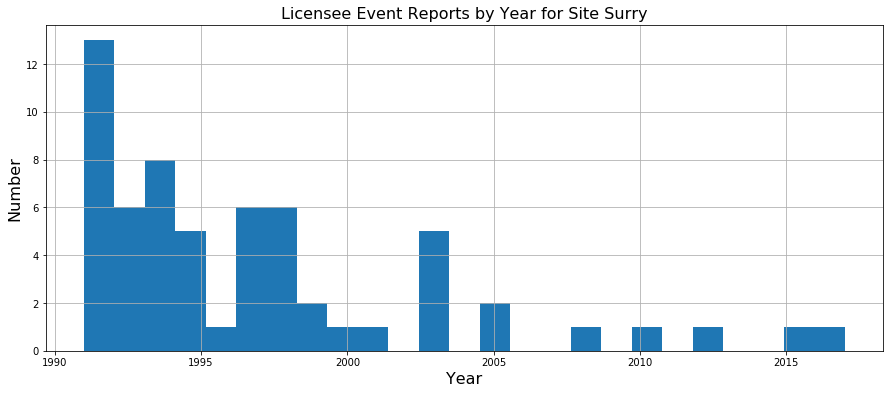

In [81]:
ax = licensee_event_reports[licensee_event_reports['Plant Name']=='Surry 1']['Report Date'].dt.year.hist(bins=25, figsize=(15,6))
ax.set_title('Licensee Event Reports by Year for Site Surry', fontsize=16);
ax.set_xlabel('Year', fontsize=16);
ax.set_ylabel('Number', fontsize=16);

#### Clearly identify shortcomings, assumptions, and next steps

The data I have been able to collect and scrape from the NRC public website is fairly limited with respect to numerical measures.  Unfortunately, this project can only utilize public datasets.  I could possibly add more datasets, but these represent the ones with the most occurrences so I'm not sure adding other available items makes sense at this point.

Next steps, I would like to employ natural language processing to the text collected from each dataset to see if I can determine any trends between sites or as a funciton of time.

I may also want to explore the trends of these datasets following major events in the nuclear industry on an industry (or site) level.

#### Other possibilities (total left turn from public NRC data):

As I'm sure is the case for everyone, our work is focusing heavily on the COVID-19 outbreak.  I've been tracking and trending the outbreak for a while now, and constructed a website and visualizations in tableau using, in particular, the skills gained in this course (particularly the use of Git).  

The website I created using data gleaned from the John's Hopkins Center for Systems Science and Engineering (thankfully, they publish their data each evening on GitHub) is available at https://www.bitsoftruth.com/covid-19.  The embedded visuals are also available at: https://public.tableau.com/profile/jason.carneal#!/ 

At work, I've been asked to create visualizations on the impacts of COVID-19 using Tableau and PowerBI for management.  Luckily, using skills from this course, I was able to turn it around quickly.  

Another possibility would be to pivot my final project to analyzing the COVID-19 outbreak and comparing it to flu data from CDC.  